In [2]:
import numpy as np
import sys
import os 
from functools import partial
import scipy
from scipy.optimize import fmin
DATA_DIR = r"C:\Users\julia\VSCode\MSiD\data"

Exercise 1
W metodzie stałokrokowej nie mamy gwarancji osiągnięcia minimum, gdyż przy stałym kroku możemy nawet przeskoczyć minimum lokalne 

In [3]:
def steepest_descent(func, gradient, learning_rate, start_point, stop_condition, write_to=None):
    current_point = start_point
    i = 1
    while True:
        print(f"ITERATION {i}", file=write_to)
        gradient_value = gradient(current_point)
        print(f"\tgradient_value = {gradient_value}", file=write_to)
        step_size = learning_rate * gradient_value
        print(f"\tstep_size = {step_size}", file=write_to)
        next_point = current_point - step_size 
        print(f"\tnext_point = {next_point}", file=write_to)
        print(f"\tf({next_point}) = {func(next_point)}", file=write_to)

        if stop_condition(current_point, next_point, write_to=write_to):
            print(f"Reached stop condition at {next_point}, value = {func(next_point)}", file=write_to)
            break 
        i += 1
        current_point = next_point
    

    return current_point


def func(X):
    return np.sum(X ** 2)

def gradient(X):
    return X * 2

def L1_norm(X):
    return np.sum(np.abs(X))

def L2_norm(X):
    return np.sqrt(np.sum(X ** 2))

def stop(current_point, next_point, error, write_to=None):
    computed = L2_norm(current_point - next_point)
    print(f"L2 = {computed}", file=write_to) 
    return computed < error 


In [4]:
h_i = 0.3
x_start = np.array([4, 4])
with open(os.path.join(DATA_DIR, "ex1.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.01), write_to=f)
    print(f"f({result}) = {func(result)}")

f([0.0065536 0.0065536]) = 8.589934592000008e-05


In [5]:
v1 = np.array([3, 4])
v2 = np.array([1, 1])

# Subtraction is element-wise
v1 - v2

array([2, 3])

In [6]:
scipy_min = fmin(func, x0=x_start)
func(scipy_min)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 44
         Function evaluations: 80


9.503461544006107e-10

Exercise 2
Minimum tej funkcji znajduje się w punkcie (1, 1)

In [7]:
def func(X):
    return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2

def gradient(X):
    return np.array([10 * X[0] ** 3 - 10 * X[0] * X[1] + 2 * X[0] - 2, 
                     -5 * (X[0] ** 2 - X[1])])

h_i = 0.1
x_start = np.array([-0.5, 1])
with open(os.path.join(DATA_DIR, "ex2.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.1), write_to=f)
    print(f"f({result}) = {func(result)}")

f([0.43228954 0.07528693]) = 0.35342448875174604


In [8]:
h_i = 0.1
# Iteration 37
with open(os.path.join(DATA_DIR, "ex2_a.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.01), write_to=f)
    print(f"f({result}) = {func(result)}")

h_i = 0.01
with open(os.path.join(DATA_DIR, "ex2_b.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.001), write_to=f)
    print(f"f({result}) = {func(result)}")

f([0.89834828 0.78934951]) = 0.011114539348035525
f([0.89761505 0.78790576]) = 0.011275402470144028


In [9]:
func(np.array([1, 2]))

2.5

In [10]:
scipy_min = fmin(func, x0=x_start)
func(scipy_min)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 109


2.3379829250198353e-10

W porównaniu z metodą zmiennokrokową, w metodzie stałokrokowej nie wykonujemy dodatkowych obliczeń, więc możemy więcej iteracji zrobić

Exercise 3

In [11]:
def var_steepest_descent(func, gradient, learning_rate, start_point, stop_condition, write_to=None):
    current_point = start_point
    i = 1
    while True:
        print(f"ITERATION {i}", file=write_to)
        gradient_value = gradient(current_point)
        print(f"\tgradient_value = {gradient_value}", file=write_to)
        step_size = learning_rate(current_point, gradient_value, write_to) * gradient_value
        print(f"\tstep_size = {step_size}", file=write_to)
        next_point = current_point - step_size 
        print(f"\tnext_point = {next_point}", file=write_to)
        print(f"\tf({next_point}) = {func(next_point)}", file=write_to)

        if stop_condition(current_point, next_point, write_to=write_to):
            print(f"Reached stop condition at {next_point}, value = {func(next_point):.2f}", file=write_to)
            break 
        i += 1
        current_point = next_point
    

    return current_point


def update_learning_rate(X, gradient, write_to=None):
    
    def metric(alpha):
        # This is original function
        return np.sum((X - alpha * gradient) ** 2)
    
    min_alpha = fmin(metric, x0=0.01, disp=False)
    print(f"\talpha = {min_alpha[0]:.2f}", file=write_to)
    return min_alpha[0]

W metodzie zmiennokrokowej wykonujemy optymalizację kierunkową współczynnika kroku. Tutaj wybieramy takie $\alpha$, by minimalizowało funkcję wejściową

In [12]:
update_learning_rate(np.array([4, 4]), np.array([8, 8]))

	alpha = 0.50


0.5000000000000007

Tutaj potrzebowaliśmy jednego kroku, by znaleźć minimum. 

In [13]:
def func(X):
    return np.sum(X ** 2)

def gradient(X):
    return X * 2

x_start = np.array([4, 4])
with open(os.path.join(DATA_DIR, "ex3.txt"), mode='w') as f:
    result = var_steepest_descent(func, gradient, update_learning_rate, x_start, partial(stop, error=0.01), write_to=f)
    print(f"f({result}) = {func(result)}")

f([-5.32907052e-15 -5.32907052e-15]) = 5.679798517591285e-29


Exercise 4

In [14]:
points = []

def var_steepest_descent_2(func, gradient, learning_rate, start_point, stop_condition, write_to=None,
                           max_iter=1000):
    current_point = start_point
    i = 1
    while True:
        print(f"ITERATION {i}", file=write_to)
        gradient_value = gradient(current_point)
        print(f"\tgradient_value = {gradient_value}", file=write_to)
        step_size = learning_rate(i, write_to) * gradient_value
        print(f"\tstep_size = {step_size}", file=write_to)
        next_point = current_point - step_size 
        points.append(next_point)
        print(f"\tnext_point = {next_point}", file=write_to)
        print(f"\tf({next_point}) = {func(next_point)}", file=write_to)

        if stop_condition(current_point, next_point, write_to=write_to) or i == max_iter:
            print(f"Reached stop condition at {next_point}, value = {func(next_point):.2f}", file=write_to)
            break 
        i += 1
        current_point = next_point
    

    return current_point

In [15]:
def lr1(i, write_to=None):
    next_step = 0.0007 * i 
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step

def lr2(i, write_to=None):
    next_step = 0.000701 * i 
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step

def lr3(i, write_to=None):
    next_step = 0.03 * np.sqrt(i) 
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step

def lr4(i, write_to=None):
    next_step = 0.03* np.power(i, 1 / 4)
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step


In [16]:
methods = [lr1, lr2, lr4]
names = ['a', 'b', 'd']

def func(X):
    return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2

def gradient(X):
    return np.array([10 * X[0] ** 3 - 10 * X[0] * X[1] + 2 * X[0] - 2, 
                     -5 * (X[0] ** 2 - X[1])])


x_start = np.array([-0.5, 1])

for method, name in zip(methods, names):
    with open(os.path.join(DATA_DIR, f"ex4{name}.txt"), mode='w') as f:
        result = var_steepest_descent_2(func, gradient, method, x_start, partial(stop, error=0.001), write_to=f)
        print(f"[{name}]: f({result}) = {func(result)}")

[a]: f([0.99054452 0.97963282]) = 9.537848629279827e-05
[b]: f([0.99059457 0.9797404 ]) = 9.436956874481766e-05
[d]: f([0.9889871  0.97629347]) = 0.00012940214379883423


In [17]:
x_start = np.array([-0.5, 1])

with open(os.path.join(DATA_DIR, f"ex4_c.txt"), mode='w') as f:
    result = var_steepest_descent_2(func, gradient, lr3, x_start, partial(stop, error=0.001), write_to=f,
                                        max_iter=300)
    print(f"[{name}]: f({result}) = {func(result)}")

C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:5: RuntimeWarning: overflow encountered in double_scalars
  return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\2746051287.py:34: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(X ** 2))
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:8: RuntimeWarning: overflow encountered in double_scalars
  return np.array([10 * X[0] ** 3 - 10 * X[0] * X[1] + 2 * X[0] - 2,
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:9: RuntimeWarning: overflow encountered in double_scalars
  -5 * (X[0] ** 2 - X[1])])
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([10 * X[0

[d]: f([nan nan]) = nan


In [18]:
len(points)
points = np.array(points)

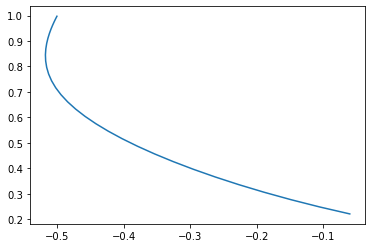

In [19]:
import matplotlib.pyplot as plt 

n_points = 33

plt.plot(points[:n_points, 0], points[:n_points, 1])